# Python Data Visualisation

This notebook presents basic concepts of data visualisation in robotics applications. Some sections are based on the [Matplotlib User Guide](https://matplotlib.org/stable/users/index.html). If started in interactive mode, you will be able to run and modify the code blocks provided as examples.

# Table of Contents
* [**Basic Plotting**](#basics)
    - [Matplotlib and Friends in Notebooks](#notebook)
    - [Line Plot](#line)
    - [Scatterplot](#scatter)
    - [Visualising Images](#imshow)
* [**Combined Plot**](#combined)


## Basic Plotting <a class="anchor" id="basics"></a>

In order to follow this tutorial, you will need to install [Matplotlib](https://matplotlib.org/stable/), a Python data visualisation library, using the *pip* command. Furthermore, [NumPy](httpw://numpy.org), a scientific computing library, is used for list management throughout the examples.

```shell
pip install matplotlib numpy
```

### Matplotlib and Friends in Notebooks <a class="anchor" id="notebook"></a>

By default, Matplotlib opens its own application window when creating a plot. However, you can embed plots in Jupyter Notebooks by using so-called cell magic (denoted by **%**) before creating your plot. This command will set Matplotlib to inline mode, where the resulting plot is stored as an image inside the notebook. Please note, that inline mode does not support interactive or animated plots.

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

The *matplotlib inline* command also works with visualisation libraries that use Matplotlib as their backend. An example of such a library is [Seaborn](https://seaborn.pydata.org/). After setting inline mode, Matplotlib and other required libraries can be imported.

### Line Plot <a class="anchor" id="line"></a>

The most straight-forward way of plotting data can be achieved by directly passing a series of data points to the [*plot*](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) function.

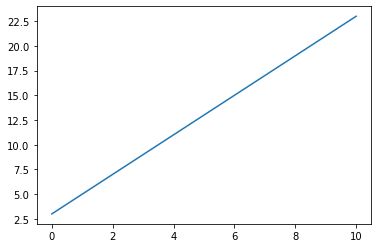

In [17]:
X = np.linspace(0, 10, num=10) # Creates a list of numbers between (start, end): [0, 1, ..., 10]
y = 2*X + 3 # f(x)

# Create plot
fig, ax = plt.subplots()
# Plot data
ax.plot(X, y)

As the plot is scaled automatically to the figure size, we can now add a title and axes descriptions:

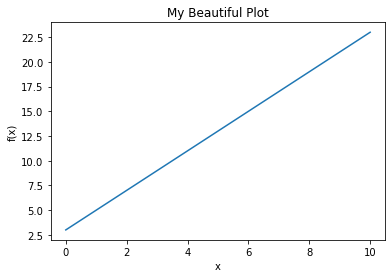

In [18]:
X = np.linspace(0, 10, num=10) # Creates a list of numbers between (start, end): [0, 1, ..., 10]
y = 2*X + 3 # f(x)

# Create plot
fig, ax = plt.subplots()

# Set title and axes descriptions
ax.set_title("My Beautiful Plot")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")

# Plot data
ax.plot(X, y)

Since matplotlib works with discrete data points, nonlinear functions need to be discretised in order to be plotted. Here is an example of a sinewave plotted over time and sampled with 100 Hz.

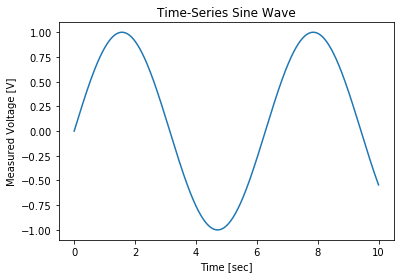

In [24]:
t_start = 0 # Start time [sec]
t_end = 10 # End time [sec]
sampling_rate = 100 # [Hz]

X = np.linspace(t_start, t_end, num=(t_end-t_start)*sampling_rate)
y = np.sin(X)

# Create plot
fig, ax = plt.subplots()

# Set title and axes descriptions
ax.set_title("Time-Series Sine Wave")
ax.set_xlabel("Time [sec]")
ax.set_ylabel("Measured Voltage [V]")

ax.plot(X, y)

Plots can be styled by manually setting what range in each axis is visualised (*x/y-ticks*) and by adding a grid.

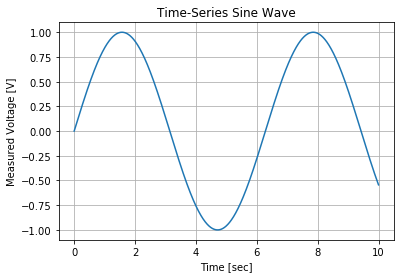

In [32]:
t_start = 0 # Start time [sec]
t_end = 10 # End time [sec]
sampling_rate = 100 # [Hz]

X = np.linspace(t_start, t_end, num=(t_end-t_start)*sampling_rate)
y = np.sin(X)

# Create plot
fig, ax = plt.subplots()

# Set title and axes descriptions
ax.set_title("Time-Series Sine Wave")
ax.set_xlabel("Time [sec]")
ax.set_ylabel("Measured Voltage [V]")

# Set axes range
ax.set_xticks = [0, 5, 10]
ax.set_yticks = [-1, 0, 1]

# Put grid behind visualised data
ax.set_axisbelow(True)
ax.grid()

ax.plot(X, y)

We can also plot multiple signals and assign them labels in order to distinguish them based on colour and line type. Always make sure that your visualisations are also readable when percieved in greyscale!

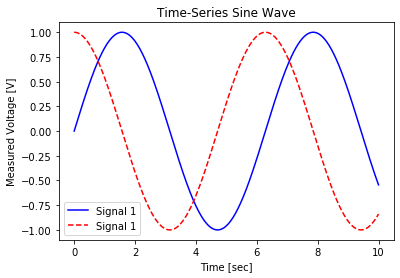

In [27]:
t_start = 0 # Start time [sec]
t_end = 10 # End time [sec]
sampling_rate = 100 # [Hz]

X = np.linspace(t_start, t_end, num=(t_end-t_start)*sampling_rate)
y1 = np.sin(X)
y2 = np.cos(X)

# Create plot
fig, ax = plt.subplots()

# Plot data
ax.plot(X, y1, label="Signal 1", c="Blue", linestyle='solid')
ax.plot(X, y2, label="Signal 1", c="Red", linestyle='dashed')

# Set title and axes descriptions
ax.set_title("Time-Series Sine Wave")
ax.set_xlabel("Time [sec]")
ax.set_ylabel("Measured Voltage [V]")

# Create legend
ax.legend()

### Scatter Plot <a class="anchor" id="scatter"></a>

Scatter plots visualise data points as circles at a certain *x, y*-position within the plot. Similarly to line plots, the resulting circles have properties that can be configured, such as radius, colour and opacity (alpha). See [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) for the documentation of the *scatter* method.

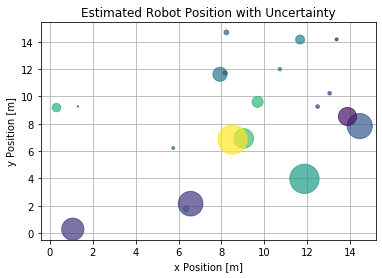

In [52]:
# Example adapted from: https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html#sphx-glr-gallery-shapes-and-collections-scatter-py

# Fixing random state for reproducibility
np.random.seed(0)

# Create random positions, radii and colours
N = 20
x = np.random.rand(N)*15
y = np.random.rand(N)*15
colours = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

# Create plot
fig, ax = plt.subplots()

# Plot data with 70% opacity
ax.scatter(x, y, s=area, c=colours, alpha=0.7)

# Set title and axes descriptions
ax.set_title("Estimated Robot Position with Uncertainty")
ax.set_xlabel("x Position [m]")
ax.set_ylabel("y Position [m]")

# Put grid behind visualised data
ax.set_axisbelow(True)
ax.grid()

### Visualising Images <a class="anchor" id="imshow"></a>

Images stored in form of [numpy arrays]() as used by [OpenCV]() can be directly plotted using the [*imshow*](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) method. When working with images that have a single channel, the applied colourmap can be altered using the *cmap* keyword. A summary of default colourmaps in matplotlib can be found [here](https://matplotlib.org/stable/users/explain/colors/colormaps.html).

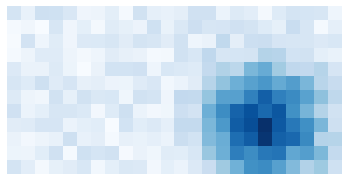

In [123]:
## Create noisy image of bivariante gaussian distribution
def conv2d(a, f):
    # Numpy only convolution: https://stackoverflow.com/questions/43086557/convolve2d-just-by-using-numpy
    s = f.shape + tuple(np.subtract(a.shape, f.shape) + 1)
    strd = np.lib.stride_tricks.as_strided
    subM = strd(a, shape = s, strides = a.strides * 2)
    return np.einsum('ij,ijkl->kl', f, subM)

# Set image resolution and mean
resolution = (36, 48)
centre = (20, 30)
# Create image and set mean to 1
data = np.zeros(resolution, dtype=float)
data[centre] = 1
# Blur multiple times to create gaussian distribtution
kernel = np.full((3,3), 1/9)
for i in range(12):
    data = conv2d(data, kernel)
# Add small amount of random noise
data += np.random.random(data.ravel().shape).reshape(data.shape)*0.005
###############################################
# Image created in "data" variable

# Create plot
fig, ax = plt.subplots()

# Plot image
ax.imshow(data, cmap="Blues")

# Remove x and y axes from plot
ax.set_axis_off()

## Combined Plot <a class="anchor" id="combined"></a>

Since all of Matplotlib's plot types operate in the same coordinate system, they can be combined in order to form coherent and visually pleasing visualisations. This example shows how plots can be combined in order to visualise a robot and its measurments of landmarks. The plot is based on simulated robot states provided by a minimal simulator, which can be found [here](./util/robotSim.py).

The next code cell prints the formats of robot state, measurements and the stored map of landmarks.

In [34]:
import util.robotSim
import matplotlib.pyplot as plt
import numpy as np

states = robotSim.realStates
measurement = robotSim.measurements[-1]
landmarks = robotSim.landmarks

print("State Format (x, y, theta):")
print(states[0])
print("-----------------------------------------------\n")
print("Measurement Format (range, bearing, signature):")
print(measurement[0])
print("-----------------------------------------------\n")
print("Landmark Format (signature, x, y):")
print([ (code, x, y) for code, (x, y) in landmarks.items() ][0])
print("-----------------------------------------------\n")

State Format (x, y, theta):
[0.4000000059604645, 0.0, 0.0]
-----------------------------------------------

Measurement Format (range, bearing, signature):
[0.7196792958655935, -2.474544802717589, 'g']
-----------------------------------------------

Landmark Format (signature, x, y):
('a', 1, 1)
-----------------------------------------------



The next code cell visualises the simulated data. It consists of three elements:

- **Map (text and circles)**: The map consisting of landmarks is plotted by drawing characters at the correct landmark positions using ```ax.annotate``` and creating circles around them using ```ax.scatter```.

- **States (arrows)**: Robot states are drawn as arrows using matplotlib's ```ax.arrow``` method. Arrows are plotted by specifying a point for the tip and the shaft respectively, therefore, the point representing the arrow's tip in carthesian coordinates is calculated from x, y and theta:
  $$
  p_2 = \begin{bmatrix}
    x + cos(\theta) \\ y + sin(\theta)
  \end{bmatrix}
  $$

- **Measurements (lines)**: Measurements are visualised as simple line plots connecting the most recent robot pose to each landmark. The landmarks' *(range, bearing)* format needs to be converted to landmark positions in carthesian world coordinates, before being passed to matplotlib's ```ax.plot``` method.

After plotting, the figure's range is set manually for x and y axes, since ```ax.arrow``` is not considered by matplotlib when detecting relevant areas of a plot. Furthermore, axes descriptions, title and a grid are added to the plot before displaying it.

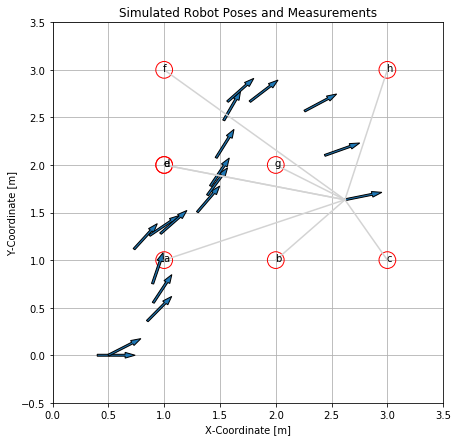

In [19]:
# Create plot of specified size
plt.rcParams['figure.figsize'] = [7, 7]
fig, ax = plt.subplots()

# Plot landmarks by their id (a-h) as text
for code, (x, y) in landmarks.items():
    ax.annotate(code, (x-0.009, y-0.009)) # Text
    ax.scatter(x, y, s=280, facecolors='none', edgecolors='r') # Red circle around text

## Plot robot states as arrows
for s in states:
    # Calculate arrow's second point from s = [x, y, theta]
    p2 = np.array([
        s[0] + np.cos(s[2]),
        s[1] + np.sin(s[2])
    ])
    # Scale arrow length
    p2 /= np.linalg.norm(p2)*4
    # Draw arrow
    ax.arrow(s[0], s[1], p2[0], p2[1], width=0.02, label="Actual Robot State")
    
## Plot latest measurement as lines connecting robot state to the landmarks
s = states[-1]
for m in measurement:
    x2 = s[0] + np.cos(s[2] + m[1])*m[0] # landmark x = robotx + cos(theta + bearing)*range
    y2 = s[1] + np.sin(s[2] + m[1])*m[0] # landmark y = roboty + sin(theta + bearing)*range
    # Measurements are visualised using a simple line plot between two points
    ax.plot([s[0], x2], [s[1], y2], c="lightgrey", label="Latest Measurement")

# Set plot zoom (automatic zoom does not work with ax.arrow)
ax.set_xlim(xmin=0, xmax=3.5)
ax.set_ylim(ymin=-0.5, ymax=3.5)

# Set title and axes descriptions
ax.set_title("Simulated Robot Poses and Measurements")
ax.set_xlabel("X-Coordinate [m]")
ax.set_ylabel("Y-Coordinate [m]")

# Put grid behind visualised data
ax.set_axisbelow(True)
ax.grid()

plt.show()